# Linear Regression Health Costs Calculator
This is my solution for the Linear Regression Health Cost Calculator project from FreeCodeCamp. Instructions for this project can be found [here](https://www.freecodecamp.org/learn/machine-learning-with-python/machine-learning-with-python-projects/linear-regression-health-costs-calculator).

## Introduction
I don't mind training another neural network, but I believe using scikit-learn with classic machine learning algorithms is a much better fit for this task than TensorFlow.

I'm going to experiment with different algorithms, starting with Linear Regression and possibly moving to ensemble algorithms such as Random Forest or Gradient Boosting, to see which ones produce the best results.


In [1]:
# Import libraries. You may or may not use all of these.
#!pip install -q git+https://github.com/tensorflow/docs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Note: I believe sklearn is better fit for this task than TensorFlow
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
# Import data
!wget https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
dataset = pd.read_csv('insurance.csv')
dataset.tail()

--2023-08-19 09:16:34--  https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 104.26.3.33, 104.26.2.33, 172.67.70.149, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|104.26.3.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50264 (49K) [text/csv]
Saving to: ‘insurance.csv’

insurance.csv       100%[===================>]  49.09K  --.-KB/s    in 0.001s  

2023-08-19 09:16:34 (64.3 MB/s) - ‘insurance.csv’ saved [50264/50264]



,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [3]:
# Define Features and labels datasets
features = dataset.drop('expenses', axis=1)
labels = dataset['expenses']

# Split the features and labels datasets into training and testing sets
train_dataset, test_dataset, train_labels, test_labels = train_test_split(
    features, labels, test_size=0.2, random_state=42
)
train_dataset.shape, test_dataset.shape, train_labels.shape, test_labels.shape

((1070, 6), (268, 6), (1070,), (268,))

In [4]:
# Define categorical and numerical columns
categorical_cols = ['sex', 'smoker', 'region']
numerical_cols = ['age', 'bmi', 'children']

# Create processing pipelines
categorical_pipeline = Pipeline([
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])
numerical_pipeline = Pipeline([
    ('scaler', StandardScaler())
])
preprocessor = ColumnTransformer([
    ('cat', categorical_pipeline, categorical_cols),
    ('num', numerical_pipeline, numerical_cols),
])
preprocessor

ColumnTransformer(transformers=[('cat',
                                 Pipeline(steps=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['sex', 'smoker', 'region']),
                                ('num',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['age', 'bmi', 'children'])])

In [5]:
# Create pipeline with the preprocessor and model
model = Pipeline([
    ('preprocessor', preprocessor), # apply preprosesing
    ('model', RandomForestRegressor()),
])
# After several experiments I found an an ensemble algorithm like RandromForest is the best choice

# Fit the pipeline to the training data
model.fit( train_dataset, train_labels)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['sex', 'smoker', 'region']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'bmi',
                                                   'children'])])),
                ('model', RandomForestRegressor())])

In [6]:
# Create an evaluation function using sklearn metrics
def custom_evaluate(x_features, y_labels, verbose=2):
  # Make predictions using the model
  y_pred = model.predict(x_features)

  # Calculate evaluation metrics
  mse = mean_squared_error(y_labels, y_pred)
  mae = mean_absolute_error(y_labels, y_pred)
  r2 = r2_score(y_labels, y_pred)
  loss = mse # since we use RandomForest mse and loss can be the same

  # Return the metrics
  return loss, mae, mse
model.evaluate = custom_evaluate

# Test the function
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)
print( 'Loss={:.2f}, MAE={:.2f}, MSE={:.2f}'.format(loss, mae, mse))


Loss=21228549.87, MAE=2517.06, MSE=21228549.87


Testing set Mean Abs Error: 2517.06 expenses
You passed the challenge. Great job!


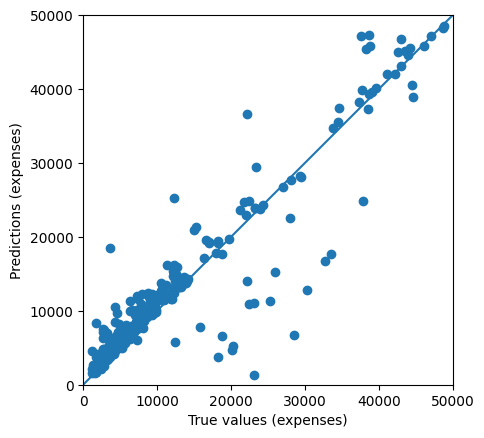

In [7]:
# RUN THIS CELL TO TEST YOUR MODEL. DO NOT MODIFY CONTENTS.
# Test model by checking how well the model generalizes using the test set.
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

if mae < 3500:
  print("You passed the challenge. Great job!")
else:
  print("The Mean Abs Error must be less than 3500. Keep trying.")

# Plot predictions.
test_predictions = model.predict(test_dataset).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)
